# Práctica final Análisis de datos de tráfico durante la pandemia de COVID-19

### 1. Enunciado

La pandemia de COVID-19 es una enfermedad infecciosa causada por el coronavirus SARS-CoV-2. Se descubrió por primera vez en Wuhan, China en diciembre de 2019 y se propagó rápidamente a nivel mundial. El primer caso confirmado de COVID-19 en España se informó el 31 de enero de 2020, y desde ese momento la enfermedad se extendió por todo el país, afectando a millones de personas. La pandemia tuvo un gran impacto en la vida de los ciudadanos españoles: para controlar la propagación del virus, se implementaron medidas restrictivas como un confinamiento domiciliario, el cierre de fronteras, el cierre de negocios y escuelas o restricciones a la movilidad. Esto llevó a una disminución en la actividad comercial y una reducción en el tráfico de vehículos en las carreteras. Además muchas actividades pasaron a realizarse desde los domicilios gracias al teletrabajo o las clases online, y se cancelaron viajes no esenciales. Todo esto impactó de forma significativa a los desplazamientos por carretera.

La ciudad de Madrid recoge datos de intensidad del tráfico desde el año 2013. Los datos se recogen y publican en tiempo real cada 5 minutos y también se almacenan, para su consulta, como datos históricos que recogen la información en períodos de 15 minutos.

- Atendiendo a los datos de la introducción, investigar y definir los períodos relevantes desde el comienzo de la pandemia hasta la actualidad que puedan haber afectado a la movilidad de las personas (p.e antes y después de la pandemia, confinamiento estricto, restricciones de movilidad entre provincias, etc...) y seleccionar los datos de intensidad de tráfico que se correspondan con esos periodos que hayas definido.
- Realizar un estudio usando SPARK, de cómo ha afectado al pandemia del covid-19 al tráfico en la ciudad de Madrid. Puedes complementar los datos del tráfico con otros datasets que consideres relevantes para enriquecer el estudio.


### 2. Librerías y carga de datos

In [1]:
import findspark
findspark.init()

import pyspark 
from pyspark.sql import SparkSession
from datetime import datetime

spark = SparkSession.builder.getOrCreate()

In [65]:
import seaborn as sns
from pyspark.sql.functions import isnan, when, count, col, regexp_replace, avg, month, dayofmonth
import matplotlib.pyplot as plt

In [2]:
feb2020 = spark.read.csv('./datos/02-2020.csv', sep = ";", header = True, inferSchema = 'true')
feb2020.show(10)

+----+-------------------+---------+----------+---------+-----+----+-----+-------------------+
|  id|              fecha|tipo_elem|intensidad|ocupacion|carga|vmed|error|periodo_integracion|
+----+-------------------+---------+----------+---------+-----+----+-----+-------------------+
|1001|2020-02-01 00:00:00|      M30|       684|      2.0|    0|55.0|    N|                  5|
|1001|2020-02-01 00:15:00|      M30|       648|      2.0|    0|54.0|    N|                  5|
|1001|2020-02-01 00:30:00|      M30|       588|      1.0|    0|56.0|    N|                  5|
|1001|2020-02-01 00:45:00|      M30|       600|      2.0|    0|50.0|    N|                  5|
|1001|2020-02-01 01:00:00|      M30|       792|      2.0|    0|58.0|    N|                  5|
|1001|2020-02-01 01:15:00|      M30|       936|      2.0|    0|57.0|    N|                  5|
|1001|2020-02-01 01:30:00|      M30|       552|      2.0|    0|65.0|    N|                  5|
|1001|2020-02-01 01:45:00|      M30|       648|   

In [7]:
#marzo 2020
mar2020 = spark.read.csv('./datos/03-2020.csv', sep = ";", header = True, inferSchema = 'true')
#abril 2020
abr2020 = spark.read.csv('./datos/04-2020.csv', sep = ";", header = True, inferSchema = 'true')
#mayo 2020
may2020 = spark.read.csv('./datos/05-2020.csv', sep = ";", header = True, inferSchema = 'true')
#junio 2020
jun2020 = spark.read.csv('./datos/06-2020.csv', sep = ";", header = True, inferSchema = 'true')
#julio 2020
jul2020 = spark.read.csv('./datos/07-2020.csv', sep = ";", header = True, inferSchema = 'true')
#agosto 2020
ago2020 = spark.read.csv('./datos/08-2020.csv', sep = ";", header = True, inferSchema = 'true')
#septiembre 2020
sep2020 = spark.read.csv('./datos/09-2020.csv', sep = ";", header = True, inferSchema = 'true')
#octubre 2020
oct2020 = spark.read.csv('./datos/10-2020.csv', sep = ";", header = True, inferSchema = 'true')
#noviembre 2020
nov2020 = spark.read.csv('./datos/11-2020.csv', sep = ";", header = True, inferSchema = 'true')
#diciembre 2020
dic2020 = spark.read.csv('./datos/12-2020.csv', sep = ";", header = True, inferSchema = 'true')

In [8]:
#unir los datasets de 2020
df2020 = feb2020.union(mar2020).union(abr2020).union(may2020).union(jun2020).union(jul2020).union(ago2020).union(sep2020).union(oct2020).union(nov2020).union(dic2020)

In [10]:
# tamaño del dataset
print("El tamaño del dataset es de: ", df2020.count(), "filas")


El tamaño del dataset es de:  120778012 filas


In [11]:
#enero 2021
ene2021 = spark.read.csv('./datos/01-2021.csv', sep = ";", header = True, inferSchema = 'true')
#febrero 2021
feb2021 = spark.read.csv('./datos/02-2021.csv', sep = ";", header = True, inferSchema = 'true')
#marzo 2021
mar2021 = spark.read.csv('./datos/03-2021.csv', sep = ";", header = True, inferSchema = 'true')
#abril 2021
abr2021 = spark.read.csv('./datos/04-2021.csv', sep = ";", header = True, inferSchema = 'true')
#mayo 2021
may2021 = spark.read.csv('./datos/05-2021.csv', sep = ";", header = True, inferSchema = 'true')
#junio 2021
jun2021 = spark.read.csv('./datos/06-2021.csv', sep = ";", header = True, inferSchema = 'true')
#julio 2021
jul2021 = spark.read.csv('./datos/07-2021.csv', sep = ";", header = True, inferSchema = 'true')
#agosto 2021
ago2021 = spark.read.csv('./datos/08-2021.csv', sep = ";", header = True, inferSchema = 'true')
#septiembre 2021
sep2021 = spark.read.csv('./datos/09-2021.csv', sep = ";", header = True, inferSchema = 'true')
#octubre 2021
oct2021 = spark.read.csv('./datos/10-2021.csv', sep = ";", header = True, inferSchema = 'true')
#noviembre 2021
nov2021 = spark.read.csv('./datos/11-2021.csv', sep = ";", header = True, inferSchema = 'true')
#diciembre 2021
dic2021 = spark.read.csv('./datos/12-2021.csv', sep = ";", header = True, inferSchema = 'true')
#unir los datasets de 2021
df2021 = ene2021.union(feb2021).union(mar2021).union(abr2021).union(may2021).union(jun2021).union(jul2021).union(ago2021).union(sep2021).union(oct2021).union(nov2021).union(dic2021)
# tamaño del dataset
print("El tamaño del dataset es de: ", df2021.count(), "filas")

El tamaño del dataset es de:  139723579 filas


In [12]:
#enero 2022
ene2022 = spark.read.csv('./datos/01-2022.csv', sep = ";", header = True, inferSchema = 'true')
#febrero 2022
feb2022 = spark.read.csv('./datos/02-2022.csv', sep = ";", header = True, inferSchema = 'true')
#marzo 2022
mar2022 = spark.read.csv('./datos/03-2022.csv', sep = ";", header = True, inferSchema = 'true')
#abril 2022
abr2022 = spark.read.csv('./datos/04-2022.csv', sep = ";", header = True, inferSchema = 'true')
#mayo 2022
may2022 = spark.read.csv('./datos/05-2022.csv', sep = ";", header = True, inferSchema = 'true')
#junio 2022
jun2022 = spark.read.csv('./datos/06-2022.csv', sep = ";", header = True, inferSchema = 'true')
#julio 2022
jul2022 = spark.read.csv('./datos/07-2022.csv', sep = ";", header = True, inferSchema = 'true')
#agosto 2022
ago2022 = spark.read.csv('./datos/08-2022.csv', sep = ";", header = True, inferSchema = 'true')
#septiembre 2022
sep2022 = spark.read.csv('./datos/09-2022.csv', sep = ";", header = True, inferSchema = 'true')
#octubre 2022
oct2022 = spark.read.csv('./datos/10-2022.csv', sep = ";", header = True, inferSchema = 'true')
#noviembre 2022
nov2022 = spark.read.csv('./datos/11-2022.csv', sep = ";", header = True, inferSchema = 'true')
#diciembre 2022
dic2022 = spark.read.csv('./datos/12-2022.csv', sep = ";", header = True, inferSchema = 'true')
#unir los datasets de 2022
df2022 = ene2022.union(feb2022).union(mar2022).union(abr2022).union(may2022).union(jun2022).union(jul2022).union(ago2022).union(sep2022).union(oct2022).union(nov2022).union(dic2022)
# tamaño del dataset
print("El tamaño del dataset es de: ", df2022.count(), "filas")

El tamaño del dataset es de:  142255081 filas


In [20]:
#enero 2023
ene2023 = spark.read.csv('./datos/01-2023.csv', sep = ";", header = True, inferSchema = 'true')
#febrero 2023
feb2023 = spark.read.csv('./datos/02-2023.csv', sep = ";", header = True, inferSchema = 'true')
#marzo 2023
mar2023 = spark.read.csv('./datos/03-2023.csv', sep = ";", header = True, inferSchema = 'true')
#abril 2023
abr2023 = spark.read.csv('./datos/04-2023.csv', sep = ";", header = True, inferSchema = 'true')
#unir los datasets de 2023
df2023 = ene2023.union(feb2023).union(mar2023).union(abr2023)
# tamaño del dataset
print("El tamaño del dataset es de: ", df2023.count(), "filas")

El tamaño del dataset es de:  49204748 filas


### 3. Analisis exploratorio de datos


#### 2020

In [14]:
#describe el dataset 2020
df2020.describe().show()

+-------+------------------+---------+------------------+---------+------------------+---------+---------+-------------------+
|summary|                id|tipo_elem|        intensidad|ocupacion|             carga|     vmed|    error|periodo_integracion|
+-------+------------------+---------+------------------+---------+------------------+---------+---------+-------------------+
|  count|         120778012|120778012|         120778012|120778012|         120778012|120778012|120760212|          120778012|
|   mean| 6080.895363752137|     null|303.01281188499775|      NaN|14.297625432019862|      NaN|     null| 13.497464902800354|
| stddev|275055.49705660186|     null| 530.9044914370792|      NaN|15.879318338483506|      NaN|     null|  3.214914699187757|
|    min|              1001|      M30|              -127|   -127.0|              -143|   -127.0|      'N'|                  1|
|    max|        1140850688|      URB|             99999|      NaN|               100|      NaN|        N|     

In [21]:
#comprobamos elementos en tipo_elem porque en posteriores aparece c30 en vez de m30 
#para ver si hay que cambiarlo
df2020.select('tipo_elem').distinct().show()

+---------+
|tipo_elem|
+---------+
|      URB|
|      M30|
+---------+



In [31]:
#separamos en 2 df uno para M30 y otro para URB
df2020_M30 = df2020.filter(df2020.tipo_elem == 'M30')
df2020_URB = df2020.filter(df2020.tipo_elem == 'URB')

#### 2021

In [15]:
#describe el dataset 2021
df2021.describe().show()

+-------+-----------------+---------+-----------------+---------+------------------+---------+---------+-------------------+
|summary|               id|tipo_elem|       intensidad|ocupacion|             carga|     vmed|    error|periodo_integracion|
+-------+-----------------+---------+-----------------+---------+------------------+---------+---------+-------------------+
|  count|        139723579|139723579|        139723579|139723579|         139723579|139723579|138277048|          139723579|
|   mean|6182.876330622765|     null|362.5860192859789|      NaN|16.724663351201446|      NaN|     null| 13.684805898079665|
| stddev|4502.931203691171|     null|619.2174296147691|      NaN| 17.43797754647471|      NaN|     null| 3.0328154809563634|
|    min|               31|      M30|                0|      0.0|                 0|      0.0|        N|                  1|
|    max|         32440320|    other|            99999|      NaN|               100|      NaN|        N|                 30|


In [22]:
df2021.select('tipo_elem').distinct().show()

+---------+
|tipo_elem|
+---------+
|      URB|
|      M30|
|    other|
+---------+



In [32]:
# separacion en 2 df
df2021_M30 = df2021.filter(df2021.tipo_elem == 'M30')
df2021_URB = df2021.filter(df2021.tipo_elem == 'URB')

#### 2022

In [16]:
#describe el dataset 2022
df2022.describe().show()    

+-------+-----------------+---------+-----------------+---------+------------------+---------+---------+-------------------+
|summary|               id|tipo_elem|       intensidad|ocupacion|             carga|     vmed|    error|periodo_integracion|
+-------+-----------------+---------+-----------------+---------+------------------+---------+---------+-------------------+
|  count|        142255081|142255081|        142255081|142255081|         142255081|142255081|141984096|          142255081|
|   mean|6349.439726353254|     null|328.1447191120013|      NaN|16.172772598540785|      NaN|     null| 13.813425251221782|
| stddev| 6446.52370236161|     null|508.0381299280809|      NaN| 16.25363515341076|      NaN|     null| 2.8645827080984585|
|    min|             1001|      C30|                0|      0.0|                 0|      0.0|        N|                  1|
|    max|         50335653|      URB|            99999|      NaN|               100|      NaN|        N|                 30|


In [23]:
df2022.select('tipo_elem').distinct().show()

+---------+
|tipo_elem|
+---------+
|      URB|
|      M30|
|      C30|
+---------+



In [29]:
#sustituimos c30 por m30 en el dataset 2022
df2022 = df2022.withColumn('tipo_elem', regexp_replace('tipo_elem', 'C30', 'M30'))
df2022.select('tipo_elem').distinct().show()

+---------+
|tipo_elem|
+---------+
|      URB|
|      M30|
+---------+



In [33]:
# separacion en 2 df
df2022_M30 = df2022.filter(df2022.tipo_elem == 'M30')
df2022_URB = df2022.filter(df2022.tipo_elem == 'URB')

#### 2023

In [17]:
#describe el dataset 2023
df2023.describe().show()

+-------+------------------+---------+------------------+---------+------------------+--------+--------+-------------------+
|summary|                id|tipo_elem|        intensidad|ocupacion|             carga|    vmed|   error|periodo_integracion|
+-------+------------------+---------+------------------+---------+------------------+--------+--------+-------------------+
|  count|          49204748| 49204748|          49204748| 49204748|          49204748|49204748|49120658|           49204748|
|   mean|  6534.92435549106|     null|365.87510882079914|      NaN|17.054769694176667|     NaN|    null| 13.747114099639328|
| stddev|273807.53799612226|     null| 603.3766789490188|      NaN|17.232657686424535|     NaN|    null| 3.0074738282468454|
|    min|              1001|      C30|                 0|      0.0|                 0|     0.0|       N|                  1|
|    max|        1140850688|    other|             91630|      NaN|               100|     NaN|       N|                 15|


In [24]:
df2023.select('tipo_elem').distinct().show()

+---------+
|tipo_elem|
+---------+
|      URB|
|      C30|
|      M30|
|    other|
+---------+



In [30]:
df2023 = df2023.withColumn('tipo_elem', regexp_replace('tipo_elem', 'C30', 'M30'))
df2023.select('tipo_elem').distinct().show()

+---------+
|tipo_elem|
+---------+
|      URB|
|      M30|
|    other|
+---------+



In [34]:
#separacion en 2 df
df2023_M30 = df2023.filter(df2023.tipo_elem == 'M30')
df2023_URB = df2023.filter(df2023.tipo_elem == 'URB')

### 4. Visualización de datos

 #### 2020

In [43]:
#media de intensidad 2020 de M30 por mes
df2020_M30.groupBy(month('fecha')).agg(avg('intensidad')).orderBy(month('fecha')).show()


+------------+------------------+
|month(fecha)|   avg(intensidad)|
+------------+------------------+
|           2|1393.7806073192094|
|           3|  753.135921000302|
|           4|317.30021838851553|
|           5| 550.8371139759372|
|           6| 1138.466737515836|
|           7|1216.7409909212035|
|           8| 960.1406670029866|
|           9|1176.5701486613475|
|          10|1054.8650611464384|
|          11|1095.1393362501155|
|          12|1109.1428816880816|
+------------+------------------+



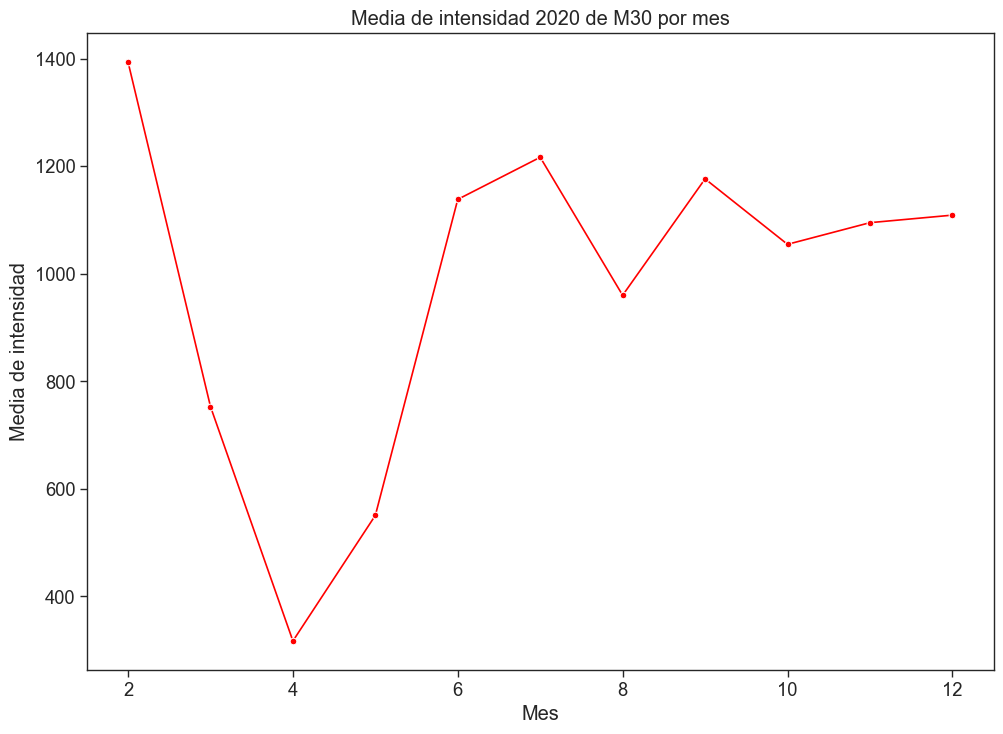

In [50]:
#representacion grafica de la media de intensidad 2020 de M30
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
sns.set_palette("Set2")
sns.set_context("paper", font_scale=1.5)
sns.set_style("ticks")
sns_plot = sns.lineplot(data=df2020_M30.groupBy(month('fecha')).agg(avg('intensidad')).orderBy(month('fecha')).toPandas(), x="month(fecha)", y="avg(intensidad)", marker='o', color='red')
sns_plot.set(xlabel='Mes', ylabel='Media de intensidad')
sns_plot.set_title('Media de intensidad 2020 de M30 por mes')
sns_plot.figure.savefig("media_intensidad_2020_M30_mes.png")




In [56]:
#media de intensidad 2020 de URB por mes
df2020_URB.groupBy(month('fecha')).agg(avg('intensidad')).orderBy(month('fecha')).show()

+------------+------------------+
|month(fecha)|   avg(intensidad)|
+------------+------------------+
|           2|  336.703820429739|
|           3| 193.3273928997388|
|           4|  86.6301860163518|
|           5|137.51525563424892|
|           6|241.30384062070686|
|           7|255.80672168332066|
|           8|193.19041964638996|
|           9|269.80761919984644|
|          10| 267.8560137430104|
|          11|273.27632232202126|
|          12| 278.3157588250555|
+------------+------------------+



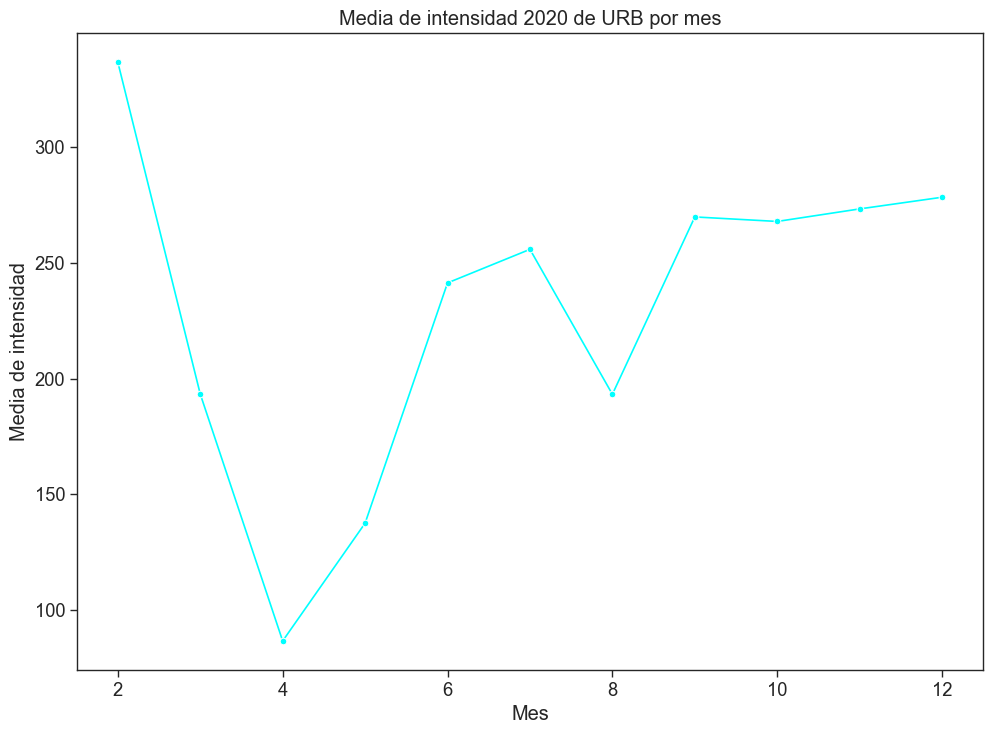

In [51]:
#representacion grafica de la media de intensidad 2020 de URB
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
sns.set_palette("Set2")
sns.set_context("paper", font_scale=1.5)
sns.set_style("ticks")
sns_plot = sns.lineplot(data=df2020_URB.groupBy(month('fecha')).agg(avg('intensidad')).orderBy(month('fecha')).toPandas(), x="month(fecha)", y="avg(intensidad)", marker='o', color='cyan')
sns_plot.set(xlabel='Mes', ylabel='Media de intensidad')
sns_plot.set_title('Media de intensidad 2020 de URB por mes')
sns_plot.figure.savefig("media_intensidad_2020_URB_mes.png")

#### 2021

In [57]:
#media de intensidad 2021 de M30 por mes
df2021_M30.groupBy(month('fecha')).agg(avg('intensidad')).orderBy(month('fecha')).show()

+------------+------------------+
|month(fecha)|   avg(intensidad)|
+------------+------------------+
|           1| 785.1481010737338|
|           2|1055.4679926444812|
|           3|1171.4529680988583|
|           4|1197.4279848060573|
|           5|1200.7572570298846|
|           6|1273.6499496114143|
|           7|1152.0109474276212|
|           8| 910.4215155914328|
|           9|1215.5566549150526|
|          10|1212.6186573710136|
|          11|1312.7760543486593|
|          12|1218.4569272109059|
+------------+------------------+



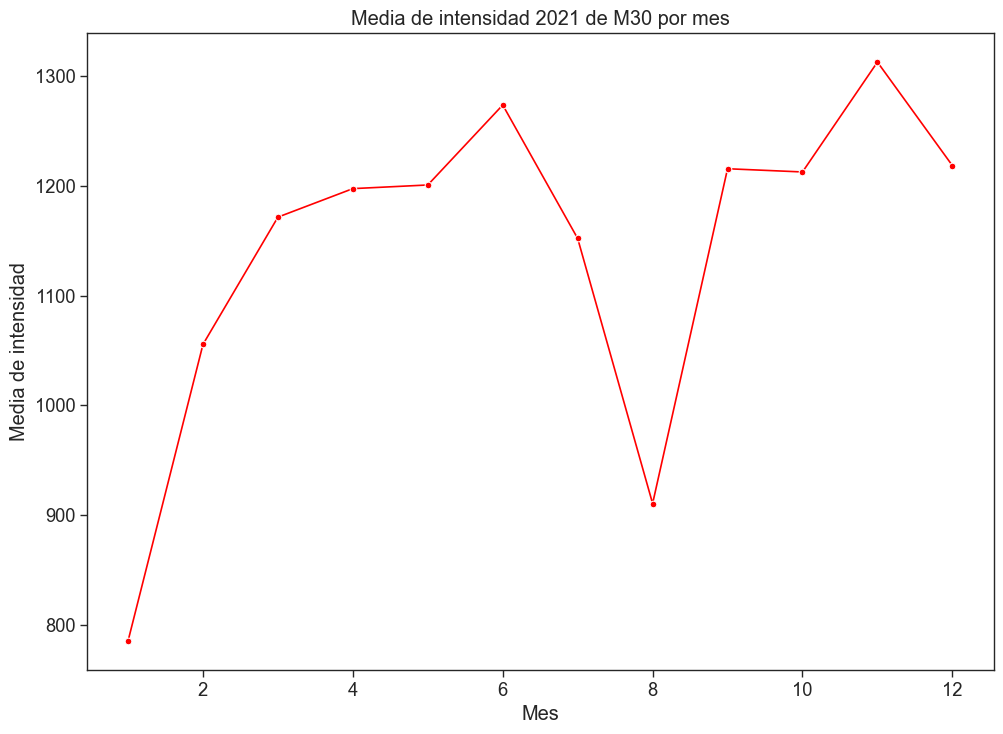

In [52]:
#representacion grafica de la media de intensidad 2021 de M30
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
sns.set_palette("Set2")
sns.set_context("paper", font_scale=1.5)
sns.set_style("ticks")
sns_plot = sns.lineplot(data=df2021_M30.groupBy(month('fecha')).agg(avg('intensidad')).orderBy(month('fecha')).toPandas(), x="month(fecha)", y="avg(intensidad)", marker='o', color='red')
sns_plot.set(xlabel='Mes', ylabel='Media de intensidad')
sns_plot.set_title('Media de intensidad 2021 de M30 por mes')
sns_plot.figure.savefig("media_intensidad_2021_M30_mes.png")

In [58]:
#media de intensidad 2021 de URB por mes
df2021_URB.groupBy(month('fecha')).agg(avg('intensidad')).orderBy(month('fecha')).show()

+------------+------------------+
|month(fecha)|   avg(intensidad)|
+------------+------------------+
|           1|223.73099459430125|
|           2|275.03162391016997|
|           3| 281.3836668562381|
|           4| 279.2616513990841|
|           5| 283.1437096779915|
|           6| 294.3940364123179|
|           7|  258.830633910311|
|           8|196.86688329729287|
|           9| 293.8521079845192|
|          10|297.89550811051413|
|          11|301.64604288175366|
|          12| 276.8356917974362|
+------------+------------------+



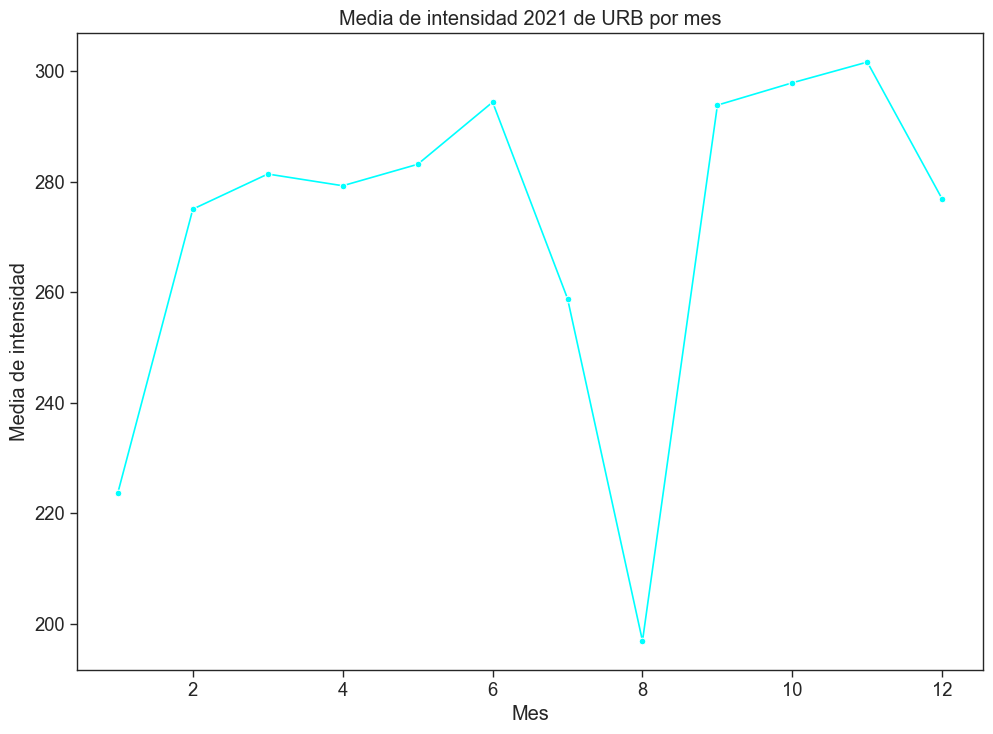

In [53]:
#representacion grafica de la media de intensidad 2021 de URB
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
sns.set_palette("Set2")
sns.set_context("paper", font_scale=1.5)
sns.set_style("ticks")
sns_plot = sns.lineplot(data=df2021_URB.groupBy(month('fecha')).agg(avg('intensidad')).orderBy(month('fecha')).toPandas(), x="month(fecha)", y="avg(intensidad)", marker='o', color='cyan')
sns_plot.set(xlabel='Mes', ylabel='Media de intensidad')
sns_plot.set_title('Media de intensidad 2021 de URB por mes')
sns_plot.figure.savefig("media_intensidad_2021_URB_mes.png")


#### 2022

In [59]:
#media de intensidad 2022 de M30 por mes
df2022_M30.groupBy(month('fecha')).agg(avg('intensidad')).orderBy(month('fecha')).show()

+------------+------------------+
|month(fecha)|   avg(intensidad)|
+------------+------------------+
|           1|1108.4037910445581|
|           2|1348.9523580224225|
|           3| 1177.670530167095|
|           4|1048.7065375033055|
|           5| 1119.329870934713|
|           6|1183.5643126786463|
|           7|  999.845084772189|
|           8| 913.3749516129033|
|           9| 974.6995716981116|
|          10|1180.0346996859892|
|          11|1170.2869045023485|
|          12|1172.5488018833228|
+------------+------------------+



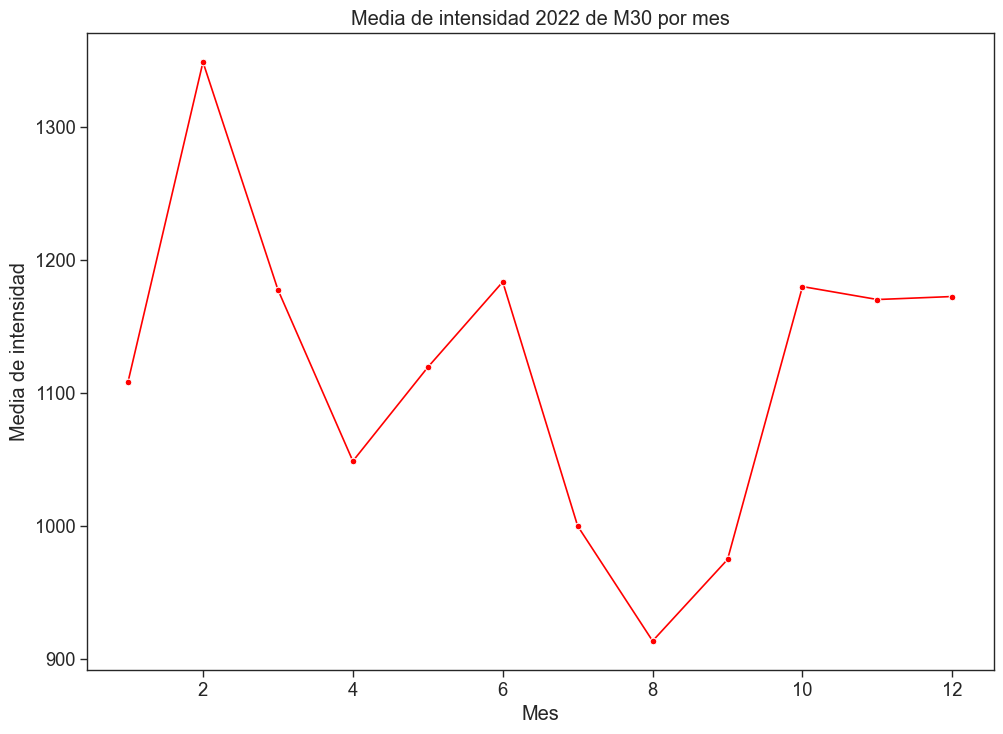

In [54]:
#representacion grafica de la media de intensidad 2022 de M30
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
sns.set_palette("Set2")
sns.set_context("paper", font_scale=1.5)
sns.set_style("ticks")
sns_plot = sns.lineplot(data=df2022_M30.groupBy(month('fecha')).agg(avg('intensidad')).orderBy(month('fecha')).toPandas(), x="month(fecha)", y="avg(intensidad)", marker='o', color='red')
sns_plot.set(xlabel='Mes', ylabel='Media de intensidad')
sns_plot.set_title('Media de intensidad 2022 de M30 por mes')
sns_plot.figure.savefig("media_intensidad_2022_M30_mes.png")


In [60]:
#media de intensidad 2022 de URB por mes
df2022_URB.groupBy(month('fecha')).agg(avg('intensidad')).orderBy(month('fecha')).show()

+------------+------------------+
|month(fecha)|   avg(intensidad)|
+------------+------------------+
|           1| 262.2349806378948|
|           2|292.03346050862376|
|           3| 296.8017947030799|
|           4| 272.1782272354547|
|           5| 291.7058661163841|
|           6| 294.3414564331853|
|           7|252.69447737625478|
|           8|197.00211844363864|
|           9|  288.948205030458|
|          10| 289.7511999953956|
|          11|  296.311218952466|
|          12| 279.9034200641226|
+------------+------------------+



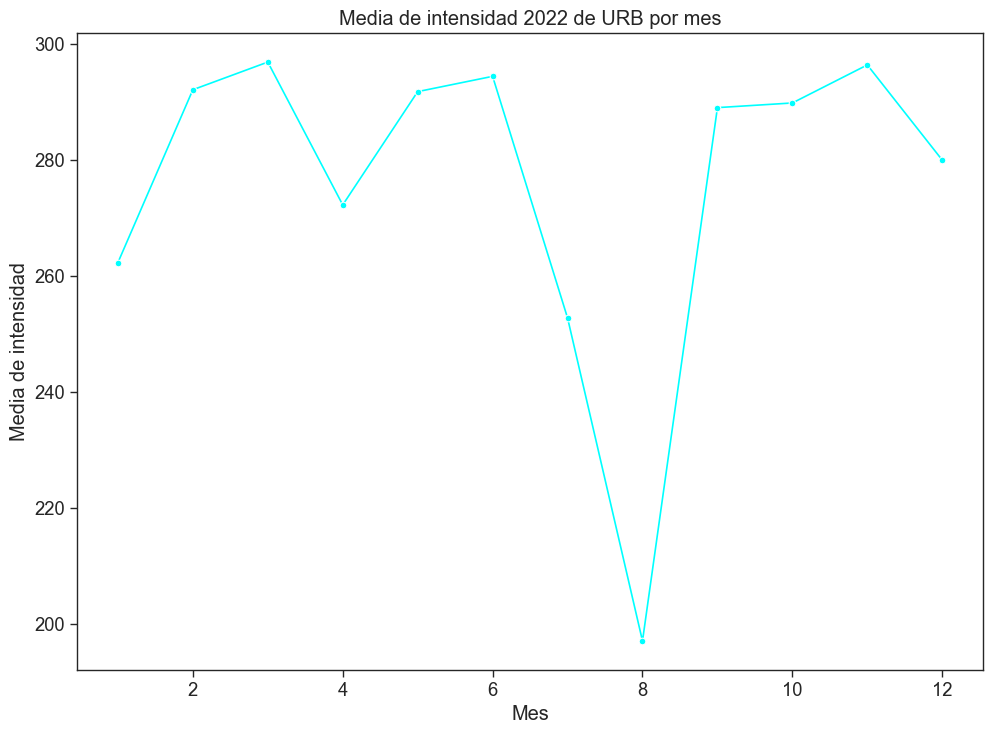

In [55]:
#representacion grafica de la media de intensidad 2022 de URB
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
sns.set_palette("Set2")
sns.set_context("paper", font_scale=1.5)
sns.set_style("ticks")
sns_plot = sns.lineplot(data=df2022_URB.groupBy(month('fecha')).agg(avg('intensidad')).orderBy(month('fecha')).toPandas(), x="month(fecha)", y="avg(intensidad)", marker='o', color='cyan')
sns_plot.set(xlabel='Mes', ylabel='Media de intensidad')
sns_plot.set_title('Media de intensidad 2022 de URB por mes')
sns_plot.figure.savefig("media_intensidad_2022_URB_mes.png")


#### 2023

In [61]:
#media de intensidad 2023 de M30 por mes
df2023_M30.groupBy(month('fecha')).agg(avg('intensidad')).orderBy(month('fecha')).show()

+------------+------------------+
|month(fecha)|   avg(intensidad)|
+------------+------------------+
|           1|1135.0083058215444|
|           2|1195.1763590291912|
|           3|1257.4158815508965|
|           4| 1142.688184082205|
+------------+------------------+



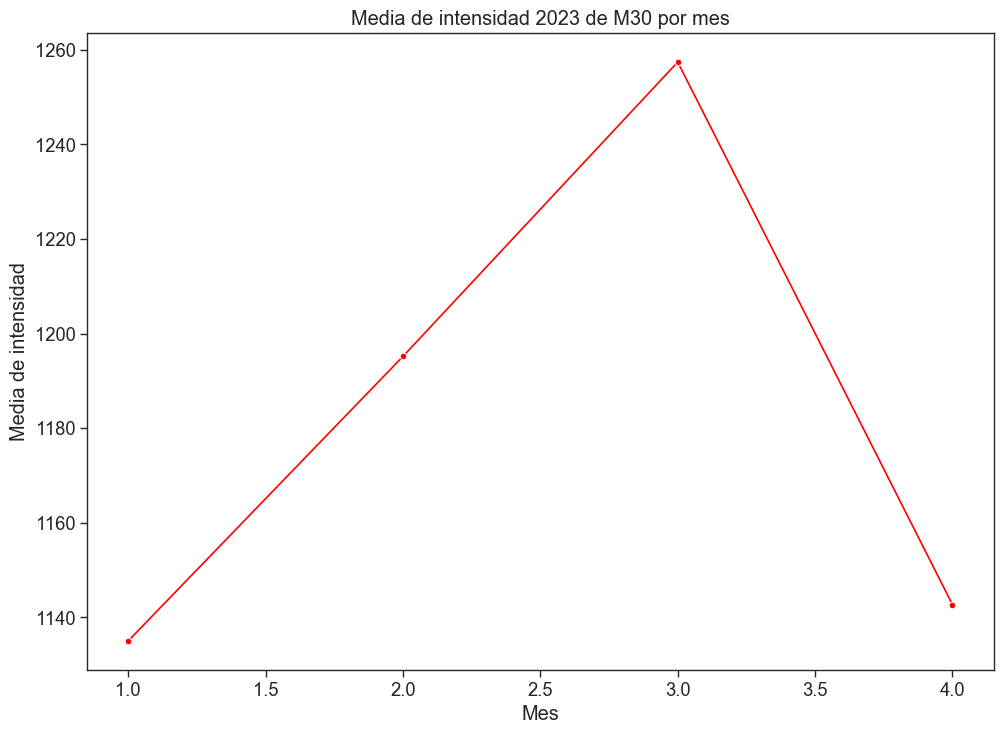

In [62]:
#representacion grafica de la media de intensidad 2023 de M30
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
sns.set_palette("Set2")
sns.set_context("paper", font_scale=1.5)
sns.set_style("ticks")
sns_plot = sns.lineplot(data=df2023_M30.groupBy(month('fecha')).agg(avg('intensidad')).orderBy(month('fecha')).toPandas(), x="month(fecha)", y="avg(intensidad)", marker='o', color='red')
sns_plot.set(xlabel='Mes', ylabel='Media de intensidad')
sns_plot.set_title('Media de intensidad 2023 de M30 por mes')
sns_plot.figure.savefig("media_intensidad_2023_M30_mes.png")


In [63]:
#media de intensidad 2023 de URB por mes
df2023_URB.groupBy(month('fecha')).agg(avg('intensidad')).orderBy(month('fecha')).show()

+------------+------------------+
|month(fecha)|   avg(intensidad)|
+------------+------------------+
|           1|278.23862408650234|
|           2|291.22747236499777|
|           3| 292.1746563840427|
|           4|265.93876432653974|
+------------+------------------+



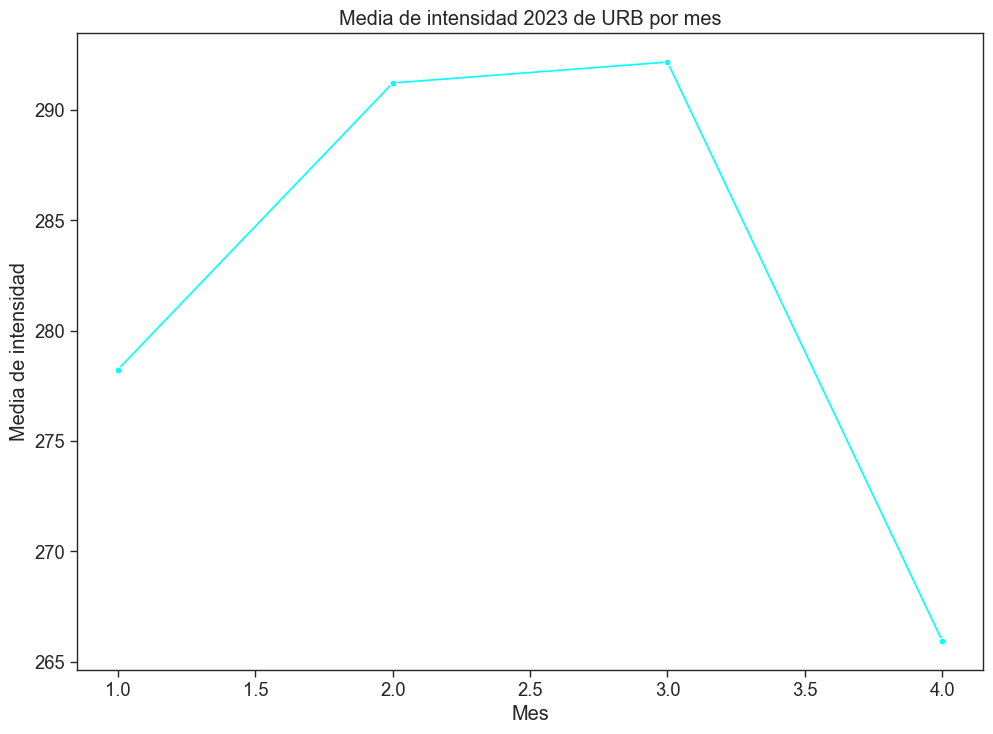

In [64]:
#representacion grafica de la media de intensidad 2023 de URB
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
sns.set_palette("Set2")
sns.set_context("paper", font_scale=1.5)
sns.set_style("ticks")
sns_plot = sns.lineplot(data=df2023_URB.groupBy(month('fecha')).agg(avg('intensidad')).orderBy(month('fecha')).toPandas(), x="month(fecha)", y="avg(intensidad)", marker='o', color='cyan')
sns_plot.set(xlabel='Mes', ylabel='Media de intensidad')
sns_plot.set_title('Media de intensidad 2023 de URB por mes')
sns_plot.figure.savefig("media_intensidad_2023_URB_mes.png")


#### Análisis de meses concretos

In [67]:
#media de intensidad de marzo de 2020 de M30 por dia
df2020_M30.filter(month('fecha')==3).groupBy(dayofmonth('fecha')).agg(avg('intensidad')).orderBy(dayofmonth('fecha')).show()

+-----------------+------------------+
|dayofmonth(fecha)|   avg(intensidad)|
+-----------------+------------------+
|                1|1011.6212660384924|
|                2| 1405.895893978857|
|                3|1426.1902390182538|
|                4|1466.0284982716682|
|                5|1482.9388508576264|
|                6|1491.6812194685285|
|                7|   1163.0974083105|
|                8|1055.5140231501243|
|                9|1406.0741630584012|
|               10|1418.4521817946395|
|               11|1317.4352042241007|
|               12|1259.9164602396238|
|               13|1146.9533410427875|
|               14| 454.0172102810762|
|               15|259.89094929393434|
|               16| 593.1123045649609|
|               17| 517.6440282791817|
|               18| 351.5812506703851|
|               19|429.50742325113237|
|               20|443.29239676976994|
+-----------------+------------------+
only showing top 20 rows



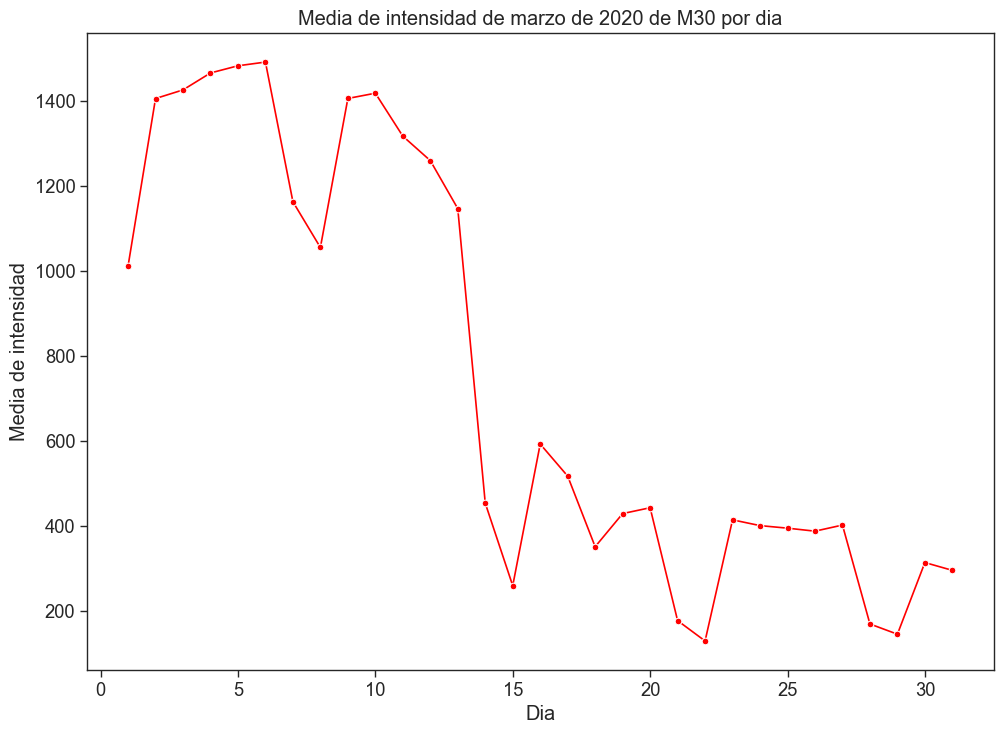

In [68]:
#representacion grafica de la media de intensidad de marzo de 2020 de M30 por dia
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
sns.set_palette("Set1")
sns.set_context("paper", font_scale=1.5)
sns.set_style("ticks")
sns_plot = sns.lineplot(data=df2020_M30.filter(month('fecha')==3).groupBy(dayofmonth('fecha')).agg(avg('intensidad')).orderBy(dayofmonth('fecha')).toPandas(), x="dayofmonth(fecha)", y="avg(intensidad)", marker='o', color='red')
sns_plot.set(xlabel='Dia', ylabel='Media de intensidad')
sns_plot.set_title('Media de intensidad de marzo de 2020 de M30 por dia')
sns_plot.figure.savefig("media_intensidad_marzo_2020_M30_dia.png")


In [73]:
# media de intensidad de marzo de 2022 de M30 por dia
df2022_M30.filter(month('fecha')==3).groupBy(dayofmonth('fecha')).agg(avg('intensidad')).orderBy(dayofmonth('fecha')).show()

+-----------------+------------------+
|dayofmonth(fecha)|   avg(intensidad)|
+-----------------+------------------+
|                1|        1252.37075|
|                2|         1253.0865|
|                3|1232.3031012287888|
|                4|1261.9261592741937|
|                5| 931.8946572580645|
|                6| 851.8860887096774|
|                7|1088.8218663997998|
|                8|        1089.56975|
|                9|           1334.88|
|               10|           1334.88|
|               11|           1334.88|
|               12|           1334.88|
|               13|           1334.88|
|               14|           1334.88|
|               15|           1334.88|
|               16|        1428.28275|
|               17|1198.9923333333334|
|               18|         1244.4395|
|               19| 939.6625833333334|
|               20|          841.6325|
+-----------------+------------------+
only showing top 20 rows



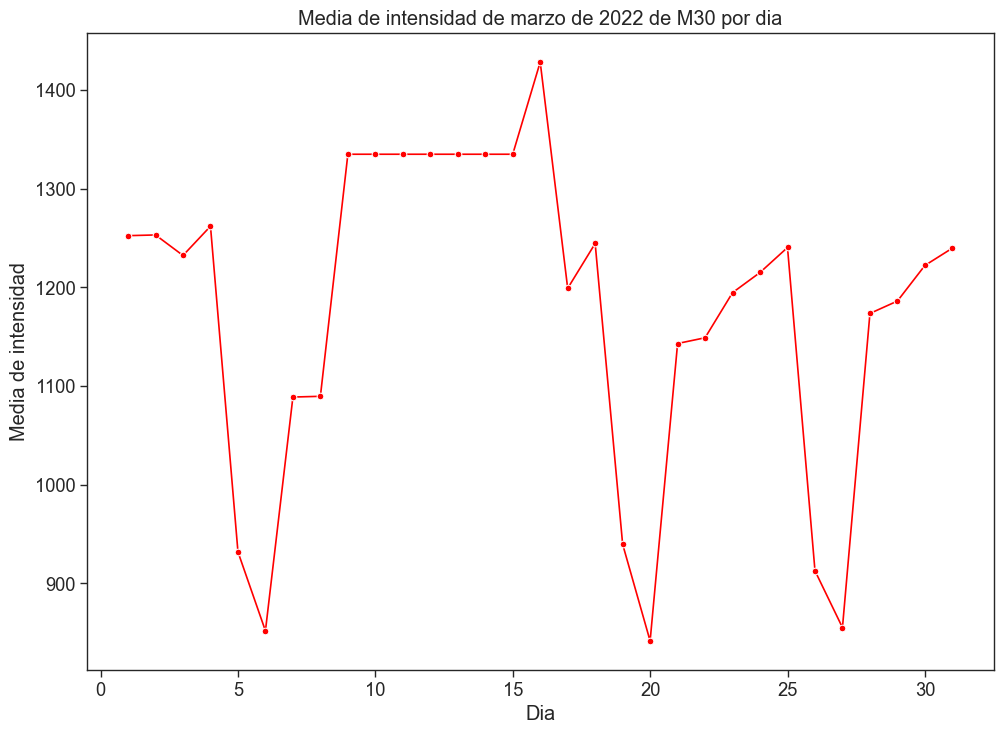

In [74]:
#representacion grafica de la media de intensidad de marzo de 2022 de M30 por dia
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
sns.set_palette("Set1")
sns.set_context("paper", font_scale=1.5)
sns.set_style("ticks")
sns_plot = sns.lineplot(data=df2022_M30.filter(month('fecha')==3).groupBy(dayofmonth('fecha')).agg(avg('intensidad')).orderBy(dayofmonth('fecha')).toPandas(), x="dayofmonth(fecha)", y="avg(intensidad)", marker='o', color='red')
sns_plot.set(xlabel='Dia', ylabel='Media de intensidad')
sns_plot.set_title('Media de intensidad de marzo de 2022 de M30 por dia')
sns_plot.figure.savefig("media_intensidad_marzo_2022_M30_dia.png")
